In [36]:
# import lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

,SITUATION,EXPENDITURE
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


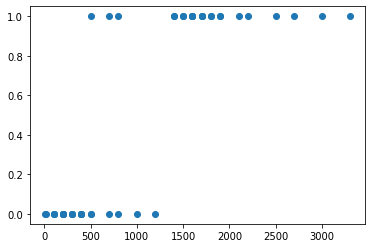

In [37]:
# loading database, chart ( with dots) visualization and statistics visualization
base = pd.read_csv('Election.csv', sep = ';')
plt.scatter(base.EXPENDITURE, base.SITUATION)
base.describe()

In [38]:
# correlation between expenditure and situation
np.corrcoef(base.EXPENDITURE, base.SITUATION)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [39]:
# creating independent variable X and dependent variable y
# transformin X to matrix by adding a new axis
X = base.iloc[:, 2].values
X = X[:, np.newaxis]
y = base.iloc[:, 1].values

In [40]:
# model creation, tranign and coefficients display
model = LogisticRegression()
model.fit(X, y)
model.coef_
model.intercept_

array([-4.60287217])

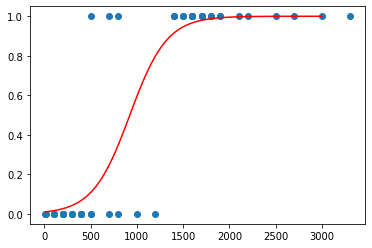

In [41]:
plt.scatter(X, y)
# generating new data to sigmoid function
X_test = np.linspace(10, 3000, 100)
# sigmoind function implementation
def modeld(x):
    return 1 / (1 + np.exp(-x))
# generating previsions ( r ) and results
r = modeld(X_test * model.coef_ + model.intercept_).ravel()
plt.plot(X_test, r, color = 'red')

In [42]:
# loading database with new candidates
base_previsoes = pd.read_csv('Newcandidates.csv', sep = ';')
# changind data to matrix format 
expedinture = base_previsoes.iloc[:, 1].values
expedinture = expedinture.reshape(-1, 1)
# generating new database with original values and predictions 
previsoes_teste = model.predict(expedinture)
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))